# Polynomial Regression

In fact, the polynomial regression does not differ too much from the multiple regression, in the sense that the model we will build is again a *linear* one: we wish to fit a polynomal of some degree to the data. The model looks like this:
$$ y(w, x) = w_0 + w_1 x + w_2 x^2 + \cdots + w_p x^p, $$
for a polynomial of degree $p$.


Thus, having a set $\left\{ (x_i, y_i): i = 1,\ldots,n \right\}$ of $n$ samples (dataset), the $n \times (p+1)$ *design* matrix can be constructed as
$$
X = \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^p \\
1 & x_2 & x_2^2 & \cdots & x_2^p \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^p \\
\end{bmatrix},
$$
which is also called a **Vandermonde matrix**, so that $y(w, x) = X w$.
Since the model constructed is linear, we may simply use the linear least squares to fit the coefficients (as well as the intercept) of the model to the data.

Therefore, for the given data $\left\{ (x_i, y_i): i = 1,\ldots,n \right\}$, we require
$$
    X w = y, \qquad y = [y_1, \ldots, y_n]^\top.
$$
to be solved for $w$. Surely, this problem is to be solved by means of *least-squares*:
$$
    \text{minimise } \tfrac{1}{2} \Vert X w - y \Vert^2.
$$

### Least-Squares Solution

Indeed, this problem has also analytically represented solution: the *first-order optimality condition* requires that we solve
$$
    X^\top X w = X^\top y.
$$
which is known to be the so-called *normal equations*.

Under the assumption that $X^\top X$ is *non-singular* (that depends on the data, and is in general very *ill-conditioned*), the solution to the *curve-fitting* problem by means of the *least-squares* sense is
$$
    w = (X^\top X)^{-1} X^\top y.
$$

**Data Generation**

In most cases, it will be nice to apply the methodology to our generated artificial data. So, let us generate some data from a polynomial in this part.

In order to be able use polynomials as beneficial as possible, although this library `numethods` does not depend on [NumPy](), nevertheless, we will use NumPy's **polynomial** module:

In [1]:
from numpy.polynomial import Polynomial

In order to be able to use our definitions later, let us construct first the model polynomial (**true** relation): let the model be
$$ y(x) = 1 + 2x - 3x^2 + 4x^3. $$

In [2]:
def poly_relation(w, x):
    p = Polynomial(w) # check help(Polynomial)
    return p(x)

def true_poly_relation(x):
    w = [1, 2, -3, 4]
    return poly_relation(w, x)

> **IMPORTANT**.
> Even further, one can write those functions without the use of NumPy! This would be another extension of the library `numethods`, as polynomials are represented by just *vectors*.

Indeed, the above definitions of the models may be simplified a lot!
Anyway, using these functions, we may now generate our data, by using NumPy's random number generation.

In [3]:
import numpy as np
np.random.seed(42)

n_samples = 20
x = np.linspace(-3, 3, n_samples)
# generate data with random noice N(0, 144)
y = true_poly_relation(x) + 12*np.random.randn(n_samples)

Let's see if the data produced is looking good (as we might possibly guess).

In [4]:
from matplotlib import pyplot as plt

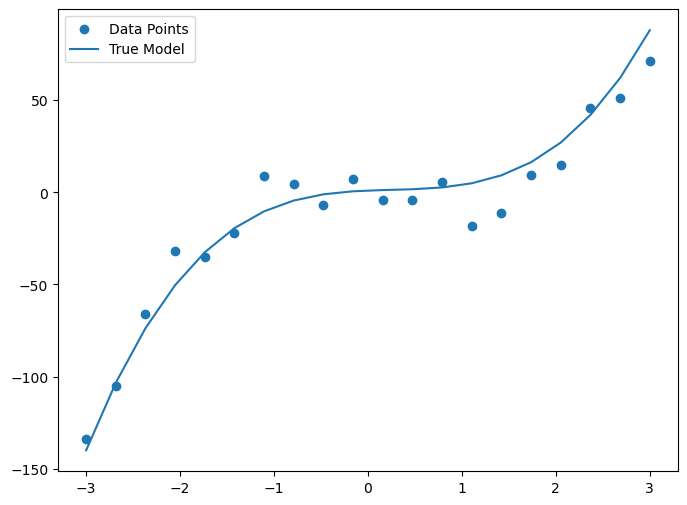

In [5]:
plt.style.use('default')
plt.figure(figsize=(8,6))
# fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(x, y, label='Data Points')
plt.plot(x, true_poly_relation(x), label='True Model')
plt.legend()
plt.show()

To sum up, our data suitable for this library is (renamed to `xx` and `yy`):

In [6]:
import sys
sys.path.append('../')
from numethods import *

In [7]:
xx, yy = Vector(x.tolist()), Vector(y.tolist())
xx, yy

(Vector([-3.0, -2.6842105263157894, -2.3684210526315788, -2.0526315789473686, -1.736842105263158, -1.4210526315789473, -1.105263157894737, -0.7894736842105265, -0.47368421052631593, -0.1578947368421053, 0.1578947368421053, 0.4736842105263155, 0.7894736842105261, 1.1052631578947363, 1.421052631578947, 1.7368421052631575, 2.052631578947368, 2.3684210526315788, 2.6842105263157894, 3.0]),
 Vector([-134.0394301638652, -105.00134977413586, -65.93469190931741, -32.06217503699786, -35.29096019342883, -22.18856169304172, 8.674420238924386, 4.792246345985944, -6.679326105486812, 7.104393070050092, -4.304269348302689, -3.889383956387331, 5.580905474275715, -18.012869277925944, -11.43643927080956, 9.633946354167364, 14.904781476529255, 45.82141266237815, 51.21597235632019, 71.0523555839765]))

We now should construct our design matrix $X$ as an object of `Matrix` class, defined in this library `numethods`.

As noticed in the definition of the `Matrix` class in `linalg.py`, we can initialise a *zero* matrix as follows:

In [8]:
A = Matrix.zeros(2, 3) # rows - columns
print(A) # each row is a vector of length 3
A[1, 2] = 1.0
print(A)
print(A.transpose())

Matrix([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])
Matrix([[0.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
Matrix([[0.0, 0.0], [0.0, 0.0], [0.0, 1.0]])


However, in order to decide the dimensions of our design matrix, we need the *degree* of the polynomial that is going to be used in the model.

**Polynomial Regression: the Design Matrix**

The design matrix for polynomial regression is not difficult to build. A quick-and-dirty one can be written as follows:

In [9]:
def design_matrix_for_poly(x_data, degree):
    n_samples, n_features = len(x_data), degree + 1
    X = Matrix.zeros(n_samples, n_features) # `Matrix.ones` is needed
    for row in range(n_samples):
        for col in range(n_features):
            X[row, col] = x_data[row] ** col

    return X

In [10]:
# quick testing:
xx_test = range(5) # 5 observation / samples
XX_design_test = design_matrix_for_poly(xx_test, 3) # for degree = 3
print(XX_design_test)

Matrix([[1.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [1.0, 2.0, 4.0, 8.0], [1.0, 3.0, 9.0, 27.0], [1.0, 4.0, 16.0, 64.0]])


Now that we succesfully construct the design matrix, we may supply it to fit the model. 


Let our model (of guess) is of degree 3:
$$ y(w, x) = w_0 + w_1 x + w_2 x^2 + w_3 x^3. $$

The solution to the linear least-squares problem can be done using the library's `LeastSquaresSolver` in `orthogonal.py`; this is also given within the `demo.py` file.

First our desing matrix:

In [11]:
degree = 3
X_design = design_matrix_for_poly(xx, degree)

Then, our least-squares solution from the library `numethods`:

In [12]:
w_ls = LeastSquaresSolver(X_design, yy).solve()
print("Least squares solution:", w_ls)

Least squares solution: Vector([-0.3219651332560268, -5.144868030256671, -3.221249753601149, 4.5650870901051475])


> **CAUTION**.
> Seemingly, the library's functions are not working correctly! It must be checked in detail!
  A quick check in `orthogonal.py`, the class `QRHouseholder` is at the end modifying the contructed matrix `Q` with `self.Q = self.Q.transpose()`, which is possibly wrong, I guess!

In order to see if the `solve` method of the `LeastSquaresSolver` class works as it should, we use NumPy to check by solving the *normal equation*:

In [13]:
X = np.array(X_design.data)
y = np.array(yy.data)

w = np.linalg.solve(X.T @ X, X.T @ y)
w

array([-0.32196513, -5.14486803, -3.22124975,  4.56508709])

In order to visualise, let us plot the regression (polynomial curve):

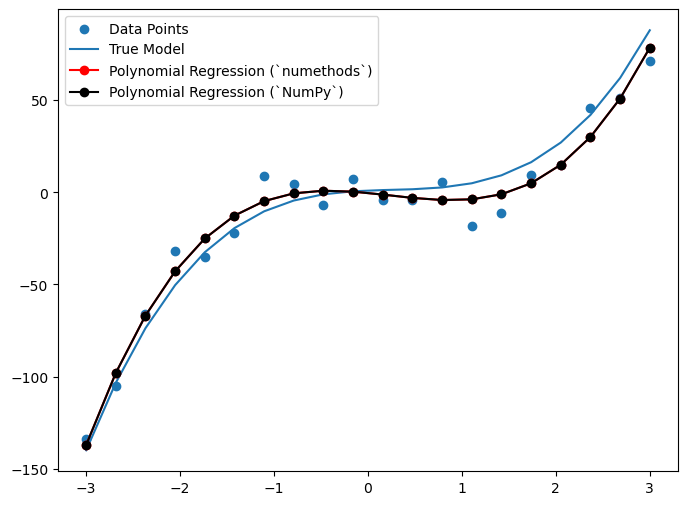

In [14]:
plt.style.use('default')
plt.figure(figsize=(8,6))
# fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(xx.data, yy.data, label='Data Points')
plt.plot(xx.data, true_poly_relation(xx.data), label='True Model')
plt.plot(xx.data, poly_relation(w_ls.data, xx.data), 
         color='red', marker='o', label="Polynomial Regression (`numethods`)")
plt.plot(xx.data, poly_relation(w, xx.data), 
         color='black', marker='o', label="Polynomial Regression (`NumPy`)")
plt.legend()
plt.show()